In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./dataset/yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [12]:
#Check if there is null value
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

Check for duplicates

In [16]:
df.duplicated().sum()

2310

In [18]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(25932, 7)

In [22]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [34]:
df.corr(numeric_only=True)

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091327,-0.006423,0.135127,0.013701
hg/ha_yield,0.091327,1.000000,-0.004067,0.065523,-0.110400
average_rain_fall_mm_per_year,-0.006423,-0.004067,1.000000,0.161483,0.333694
pesticides_tonnes,0.135127,0.065523,0.161483,1.000000,0.045577
avg_temp,0.013701,-0.110400,0.333694,0.045577,1.000000


Total unique area available

In [42]:
len(df['Area'].unique())

101

In [44]:
len(df['Item'].unique())


10

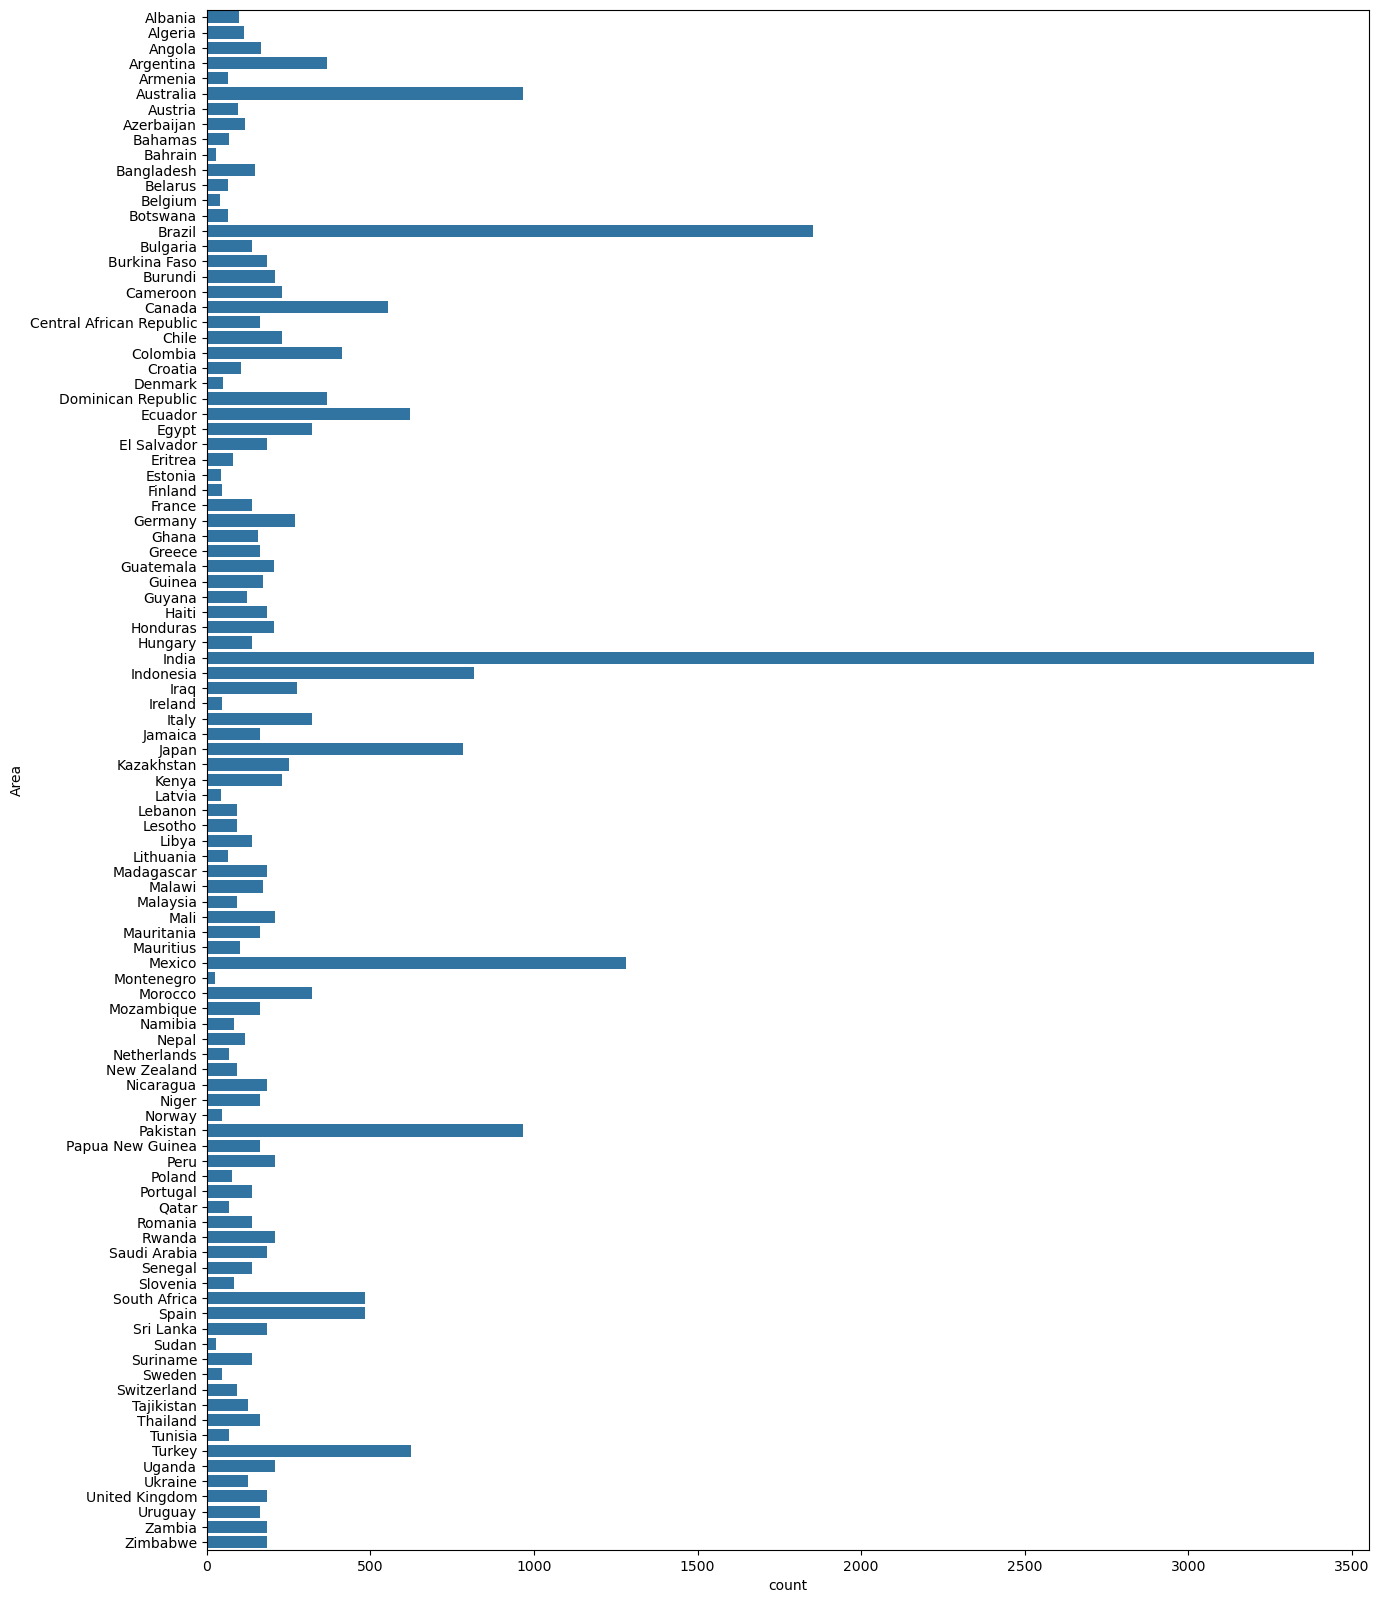

In [46]:
plt.figure(figsize=(15, 20))
sns.countplot(y= df['Area'])
plt.show()

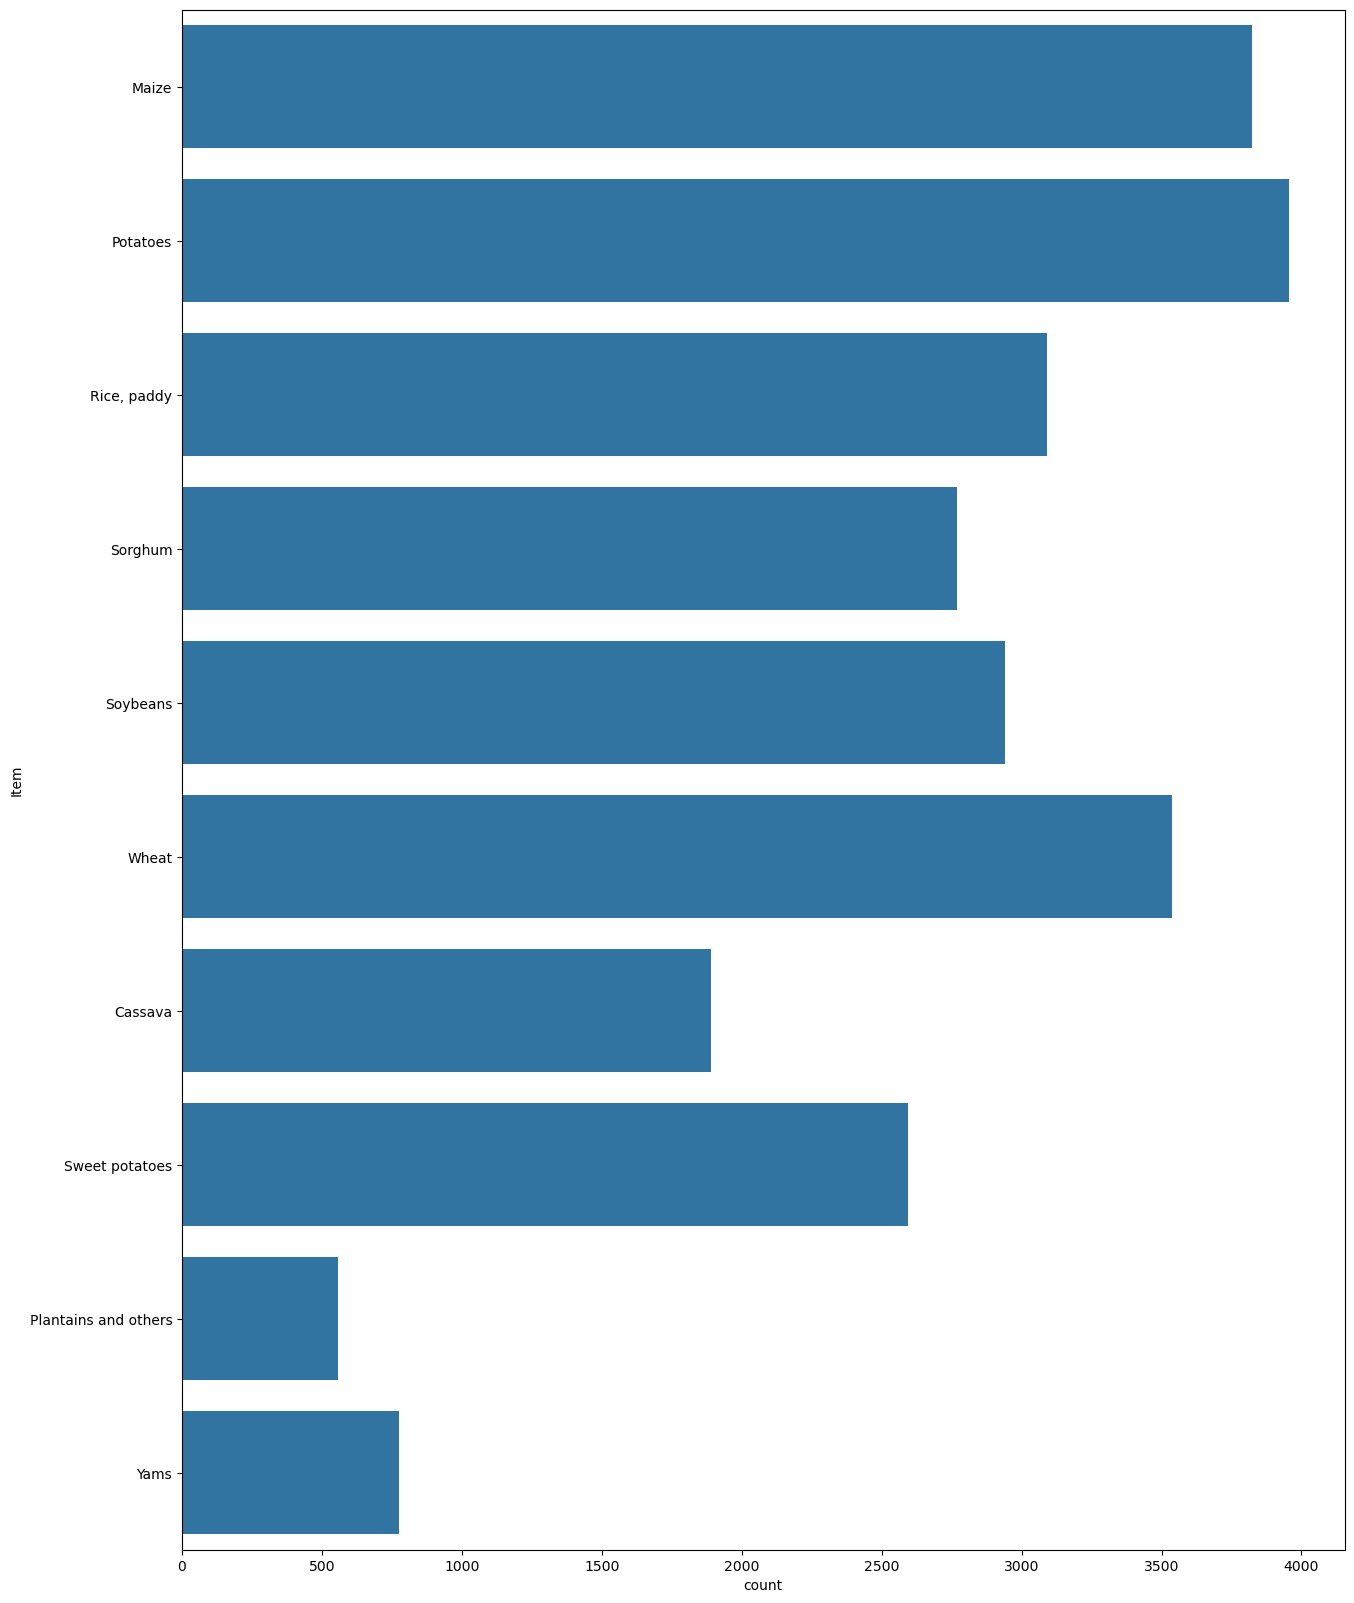

In [48]:
plt.figure(figsize=(15, 20))
sns.countplot(y= df['Item'])
plt.show()

In [52]:

(df['Area'].value_counts() < 400).sum()

88

In [56]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

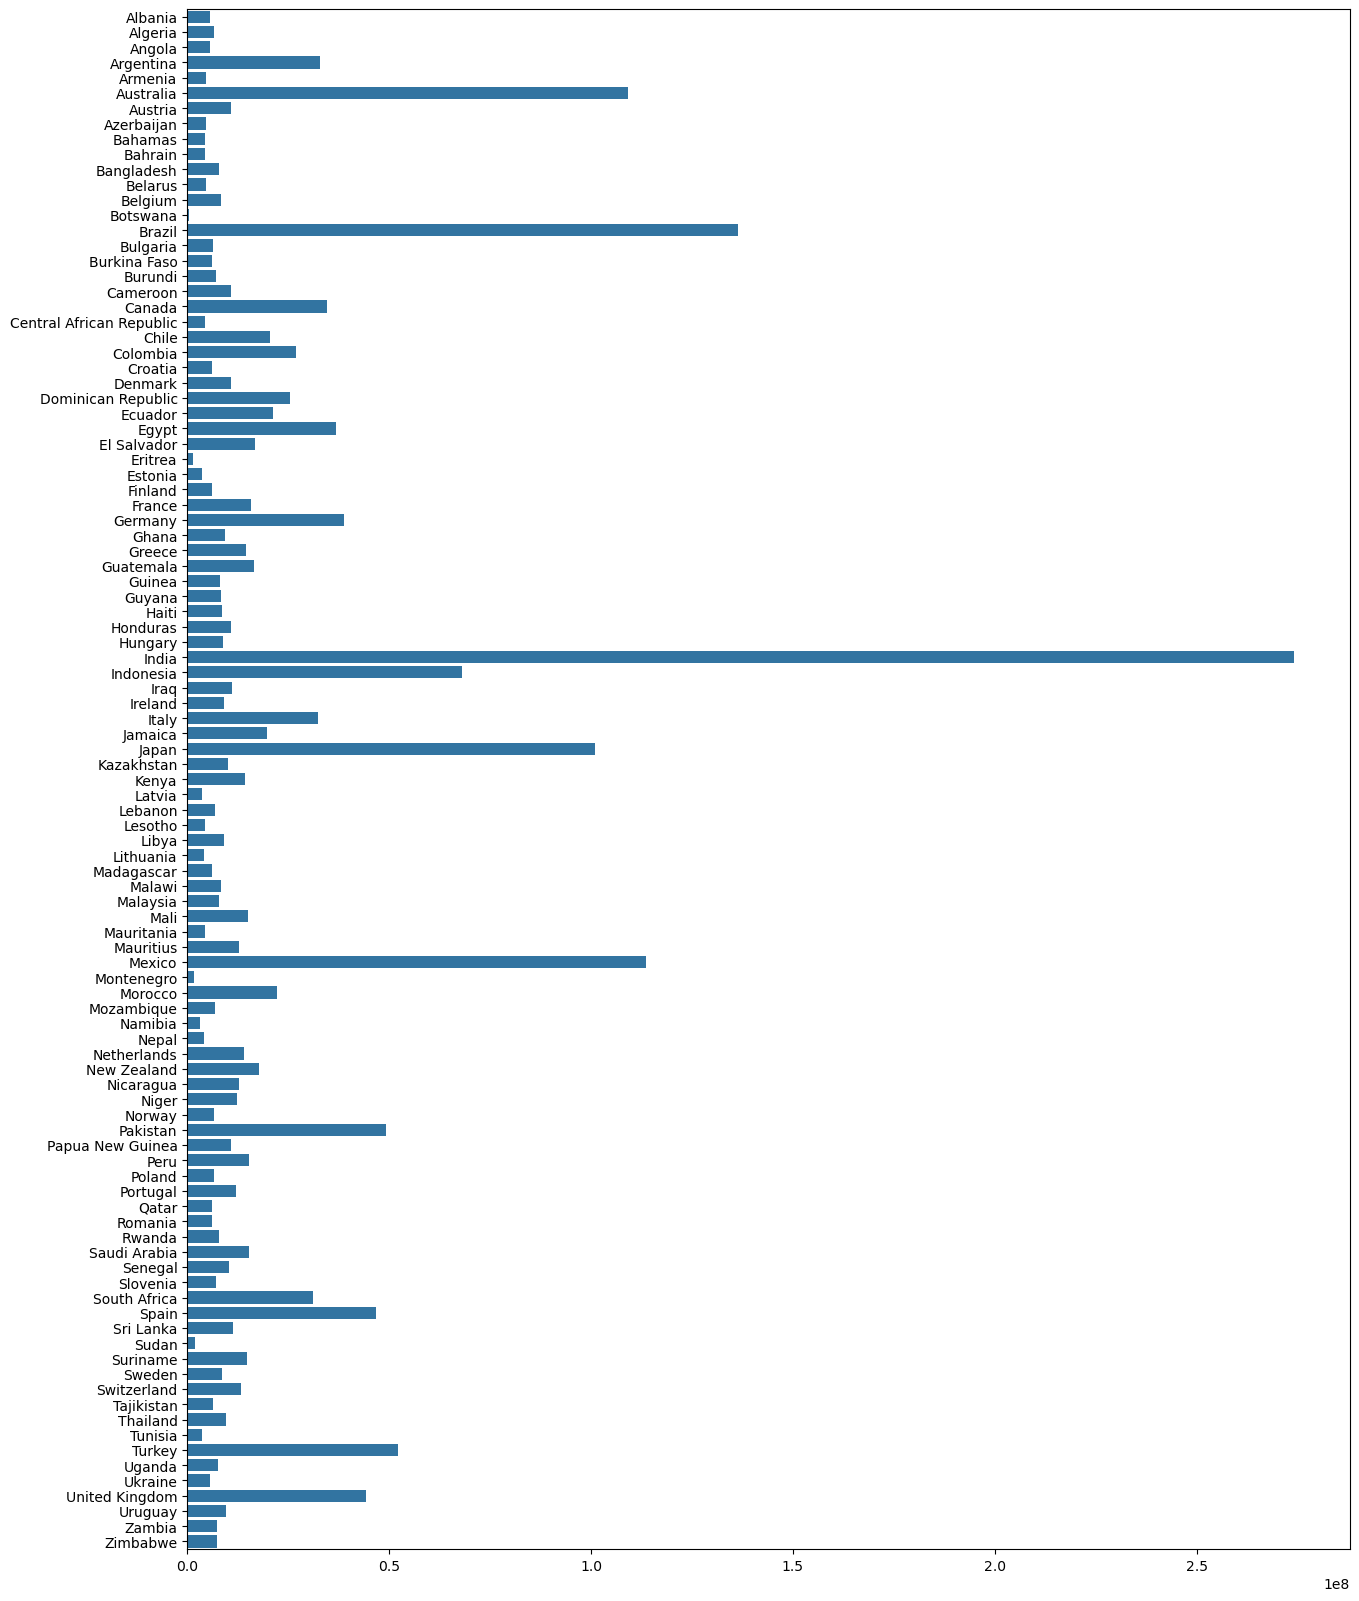

In [60]:
plt.figure(figsize=(15, 20))
sns.barplot(y= country, x = yield_per_country)
plt.show()

In [62]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops :
    yield_per_crop.append(df[df['Item'] == crop]['hg/ha_yield'].sum())

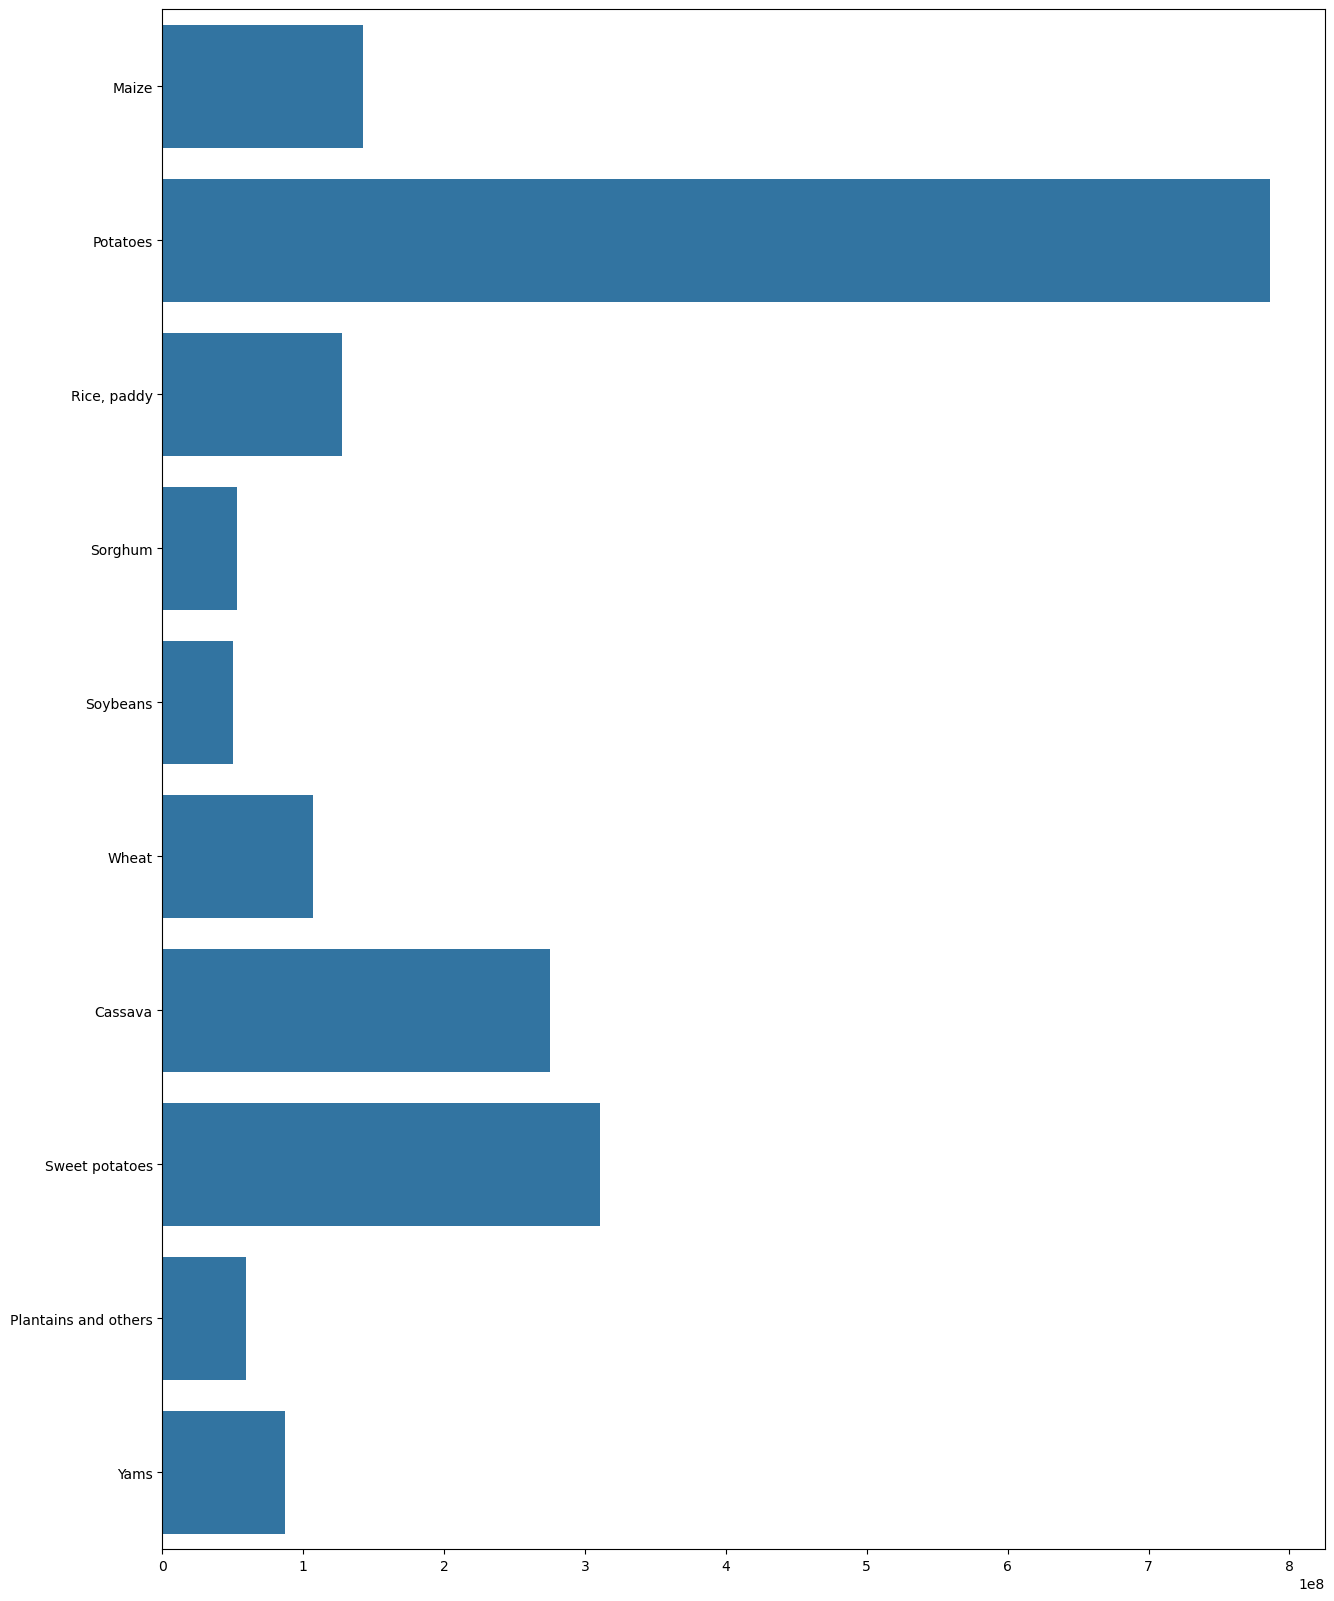

In [64]:
plt.figure(figsize=(15, 20))
sns.barplot(y= crops, x = yield_per_crop)
plt.show()

In [66]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [70]:
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

In [72]:
print(X.shape)
print(y.shape)

(25932, 6)
(25932,)


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0, shuffle=True)